In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt

from src.plotting import scatter_plotting

In [9]:
'''
이미지 출력을 위한 region_list
강원 영서, 충남의 경우 Infferece 결과가 2가지 (group 1, group 3)
R4_63 : g3, g5
R4_65 : g3, g5

63,65 권역을 뽑을 때는 수동으로 g1,g3를 삭제하여 run
'''
region_list = [59,
               60,
               61,
               62,
               63,
            #    '63_g3',
               64,
               65,
            #    '65_g3',
               66,
               67,
               68
               ]
horizon_list=[3, 4, 5, 6]
start_year = 2021
end_year=2022

r4_result_dir = f'./data_folder/all_best_result_r4.xlsx'
result_root_dir = f'/home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU'

In [ ]:
# 결과정보를 불러와서 권역별 Scatter plot 생성
for num in region_list:
    for pm_type in ['PM10', 'PM25']:
        for horizon in horizon_list:
            region = f"R4_{num}"

            start_result_dir = f'{result_root_dir}/{region}/{region}_{start_year}inference.xlsx'
            start_cmaq_dir = f'./data_folder/cmaq{start_year}.csv'
            end_result_dir = f'{result_root_dir}/{region}/{region}_{end_year}inference.xlsx'
            end_cmaq_dir = f'./data_folder/cmaq{start_year}.csv'
                        
            save_dir =  f'{result_root_dir}/Comparing_ScatterPlot/{region}'
            
            start_result_df = pd.read_excel(start_result_dir, index_col=0)
            start_cmaq_df = pd.read_csv(start_cmaq_dir, index_col=0)

            end_result_df = pd.read_excel(end_result_dir, index_col=0)
            end_cmaq_df = pd.read_csv(end_cmaq_dir, index_col=0)
            
            start_cmaq_df.rename(columns={'pm':'pm_type', 'region':'predict_region'}, inplace=True)
            end_cmaq_df.rename(columns={'pm':'pm_type', 'region':'predict_region'}, inplace=True)

            r4_result_df = pd.read_excel(r4_result_dir, index_col=0)
            r4_result_df.rename(columns={'pm':'pm_type', 'region':'predict_region'}, inplace=True)
            # f1 socred으로 top_k % 설정 --> top_prob로 변경
            top_models= scatter_plotting(region, start_result_df, start_cmaq_df, r4_result_df, pm=pm_type, horizon=horizon, check_column='run_type', year=start_year, save_dir=save_dir, top_prob=.2)
            _ = scatter_plotting(region, end_result_df, end_cmaq_df, r4_result_df, pm=pm_type, horizon=horizon, check_column='run_type', year=end_year, save_dir=save_dir, top_models=top_models)
                        

In [11]:
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

# 각 권역별 2021, 2022 Plot 이미지 병합
for num in region_list:
    for horizon in horizon_list:
        for pm_type in ['PM10', 'PM25']:
            region = f"R4_{num}"
            save_dir =  f'{result_root_dir}/Comparing_ScatterPlot/{region}'
            horizon_dir = f'{save_dir}/H{horizon}'

            # image path
            image_path_2021 = f'{horizon_dir}/{pm_type}_2021.png'
            image_path_2022 = f'{horizon_dir}/{pm_type}_2022.png'
            # load image
            image_2021 = Image.open(image_path_2021)
            image_2022 = Image.open(image_path_2022)

            # Merge images together horizontally
            merged_image = Image.new('RGB', (image_2021.width + image_2022.width, image_2021.height))
            merged_image.paste(image_2021, (0, 0))
            merged_image.paste(image_2022, (image_2021.width, 0))

            # save image
            merged_image.save(f'{horizon_dir}/{pm_type}_merged.png')
            
            # image show
            # plt.imshow(merged_image)
            # plt.axis('off')
            # plt.show()
            





In [ ]:
# region_list = [59,60,61,62,63,64,65,66,67,68]
# for num in region_list:
#     for year in [2021, 2022]:
#         for pm_type in ['PM10', 'PM25']:
#             region = f"R4_{num}"
#             result_type = year
#             pm = pm_type
#             result_dir = f'/home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/{region}/{region}_{result_type}inference.xlsx'
#             save_dir =  f'/home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/{region}/{region}_{result_type}'
#             cmaq_dir = f'./data_folder/cmaq{result_type}.csv'
#             r4_result_dir = f'./data_folder/all_best_result_r4.xlsx'
#             result_df = pd.read_excel(result_dir, index_col=0)
#             cmaq_df = pd.read_csv(cmaq_dir, index_col=0)
#             cmaq_df.rename(columns={'pm':'pm_type', 'region':'predict_region'}, inplace=True)
#             r4_result_df = pd.read_excel(r4_result_dir, index_col=0)
#             r4_result_df.rename(columns={'pm':'pm_type', 'region':'predict_region'}, inplace=True)
            
            
#             scatter_plotting(region, result_df, cmaq_df, r4_result_df, pm=pm, check_column='run_type', save_dir=save_dir)

save :  /home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/R4_76/R4_76_2021/H3/PM10.png
save :  /home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/R4_76/R4_76_2021/H4/PM10.png
save :  /home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/R4_76/R4_76_2021/H5/PM10.png
save :  /home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/R4_76/R4_76_2021/H6/PM10.png
save :  /home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/R4_76/R4_76_2021/H3/PM25.png
save :  /home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/R4_76/R4_76_2021/H4/PM25.png
save :  /home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/R4_76/R4_76_2021/H5/PM25.png
save :  /home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/R4_76/R4_76_2021/H6/PM25.png
save :  /home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/R4_76/R4_76_

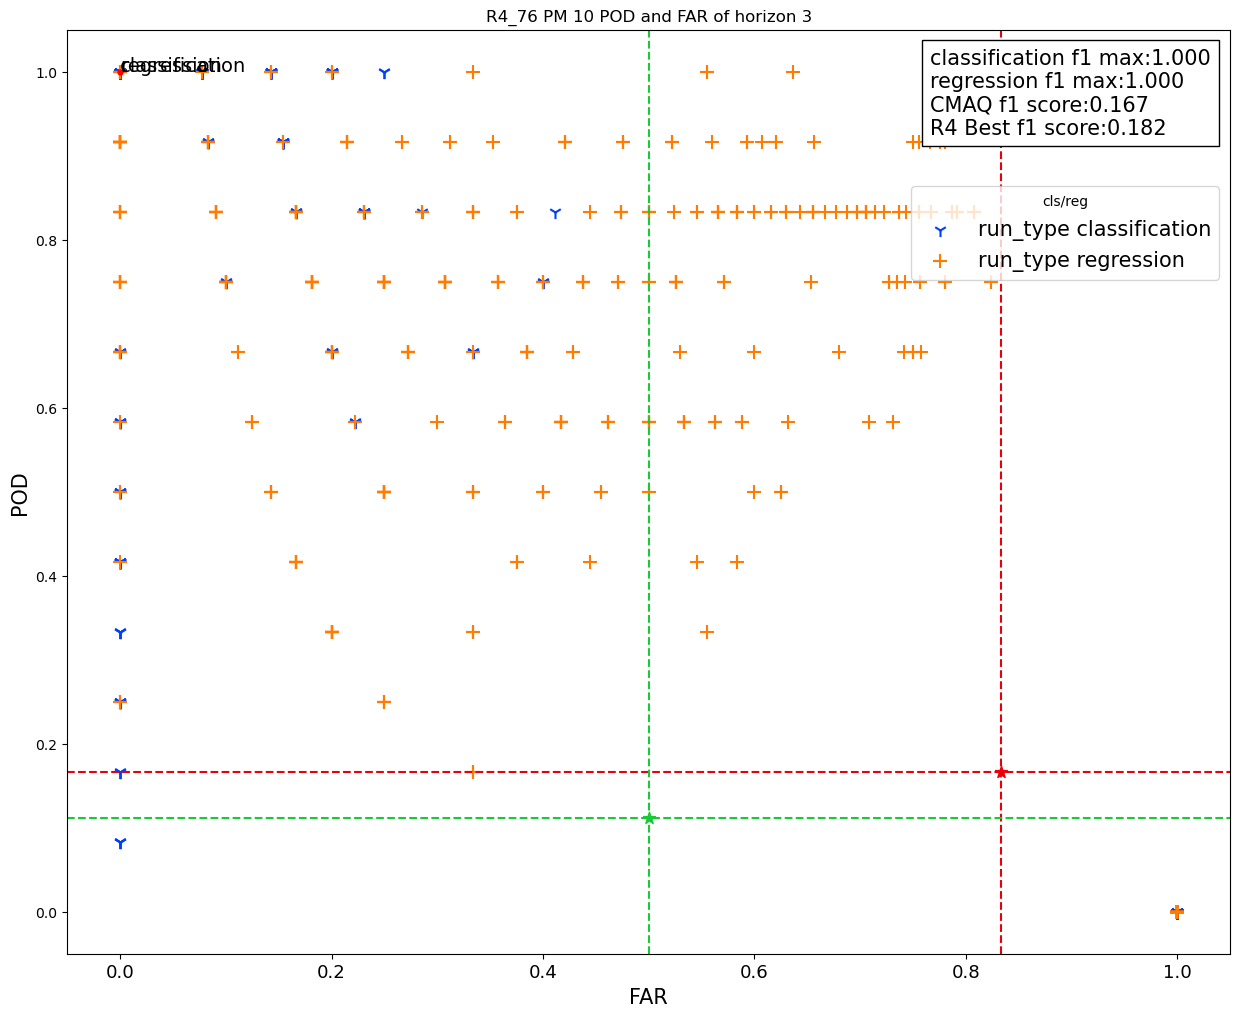

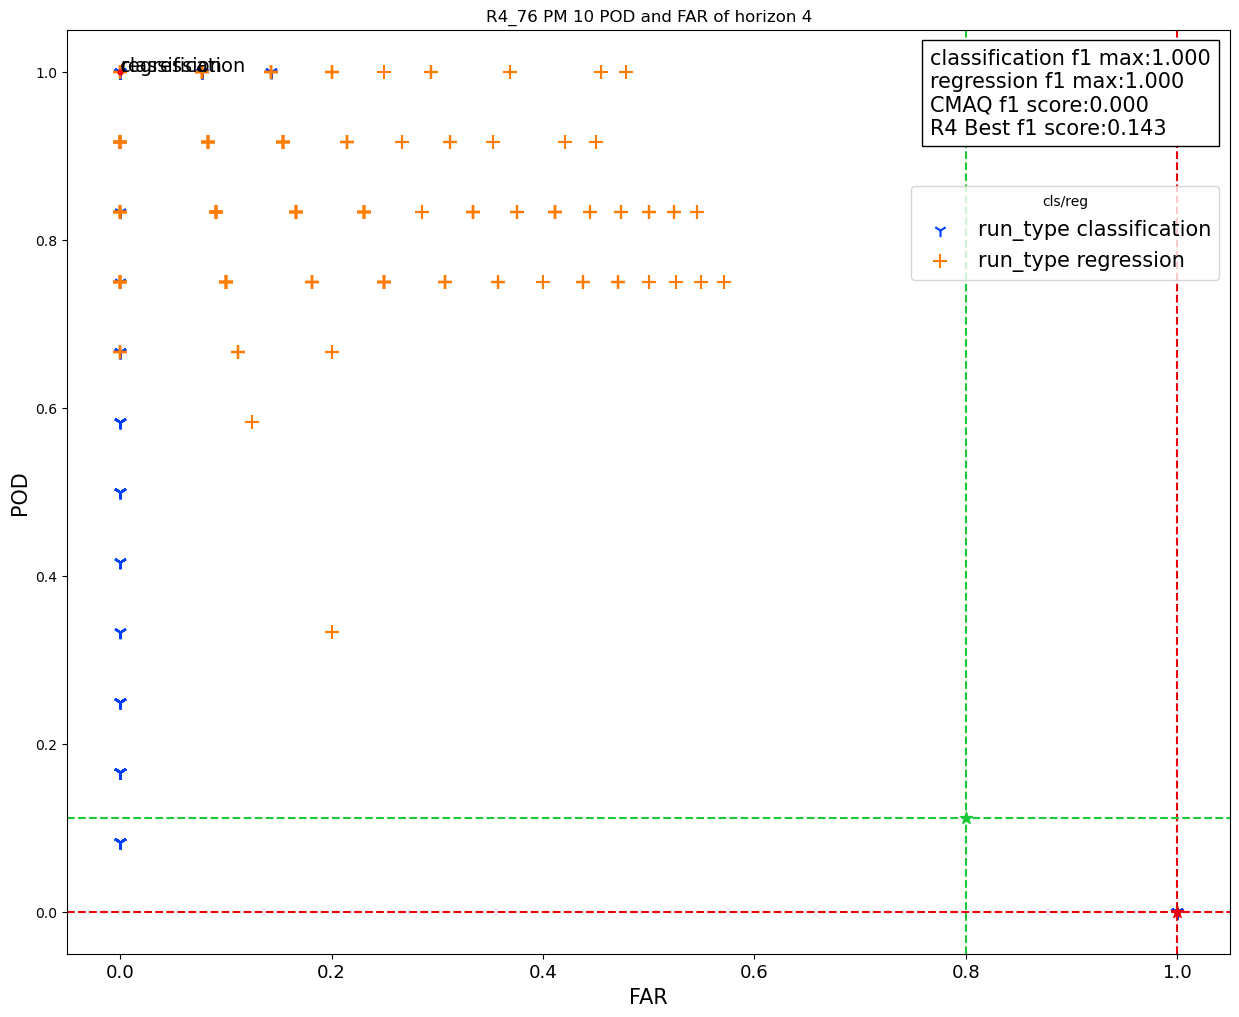

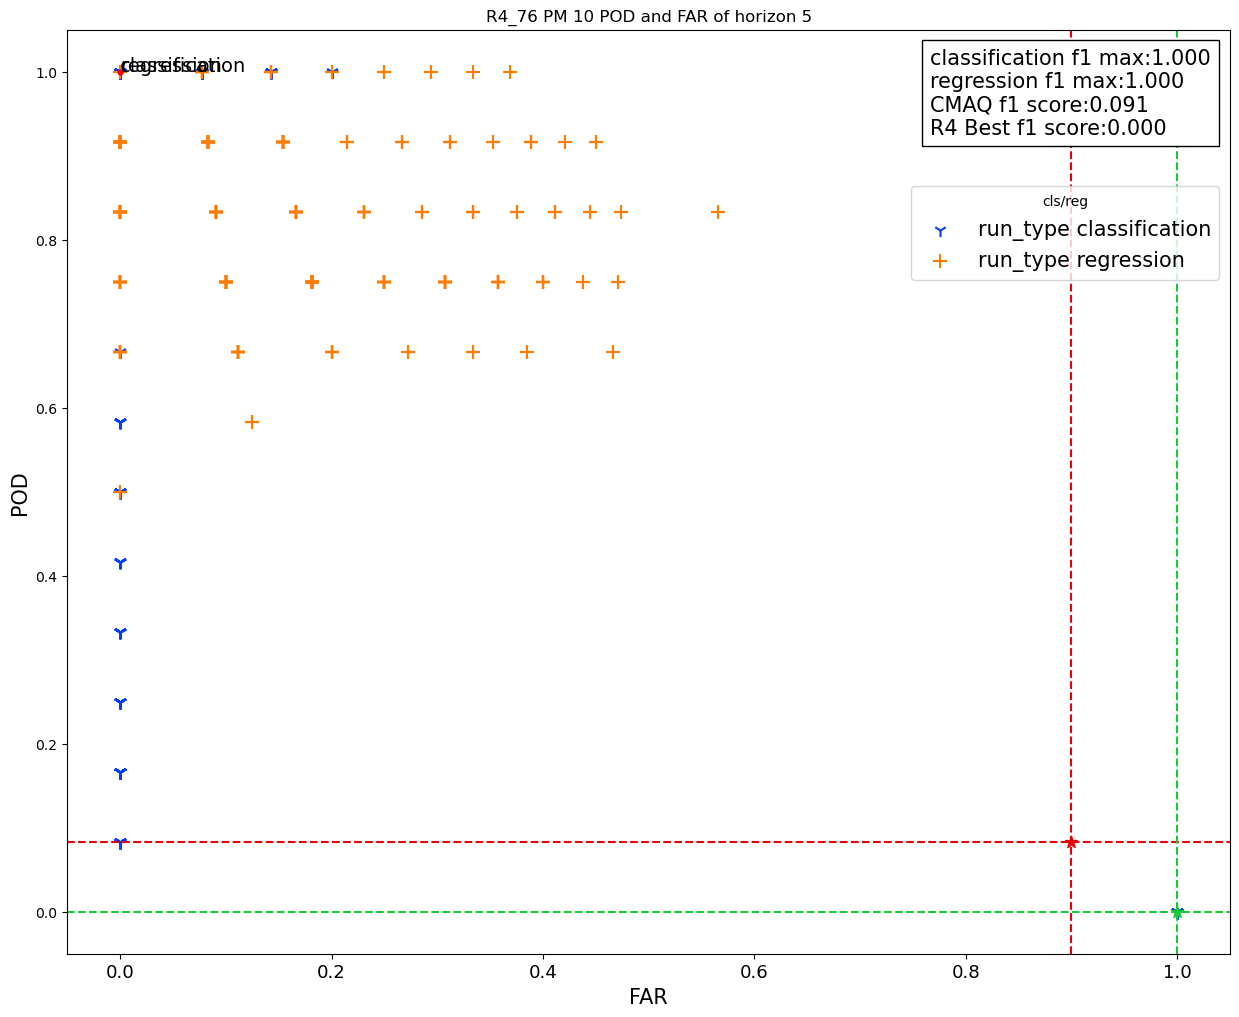

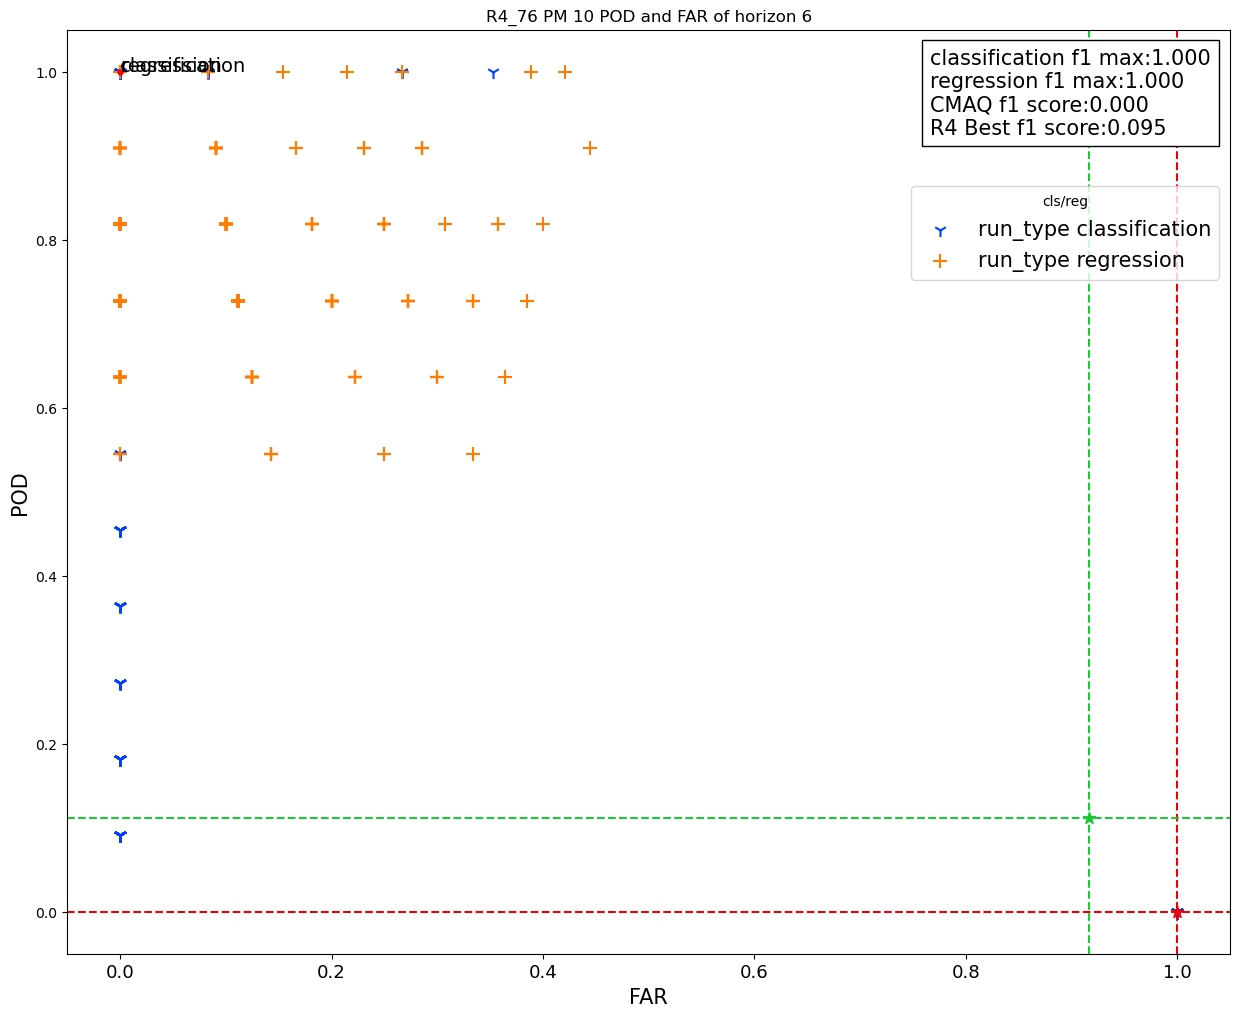

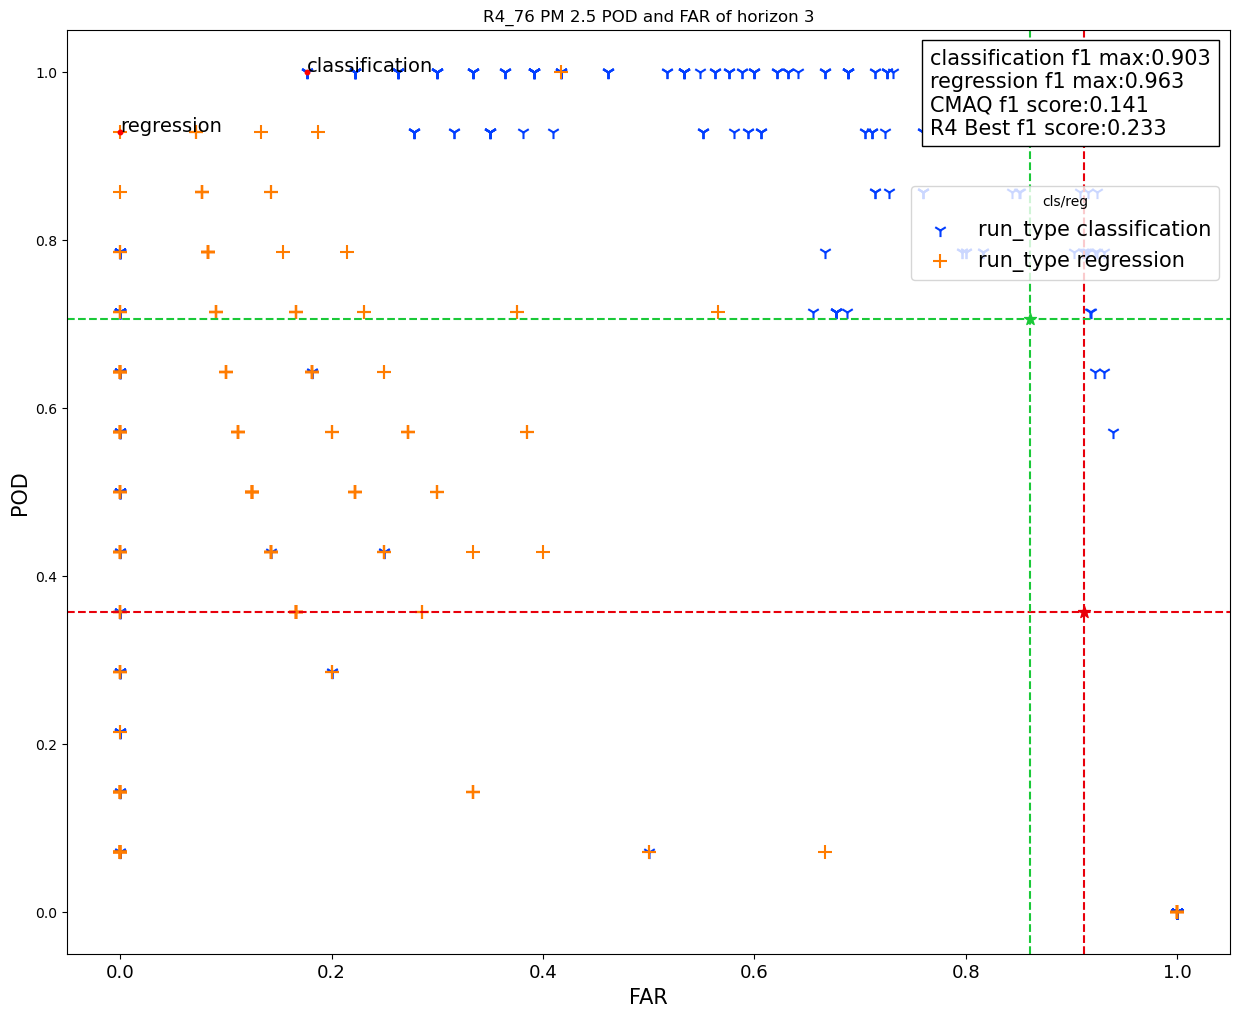

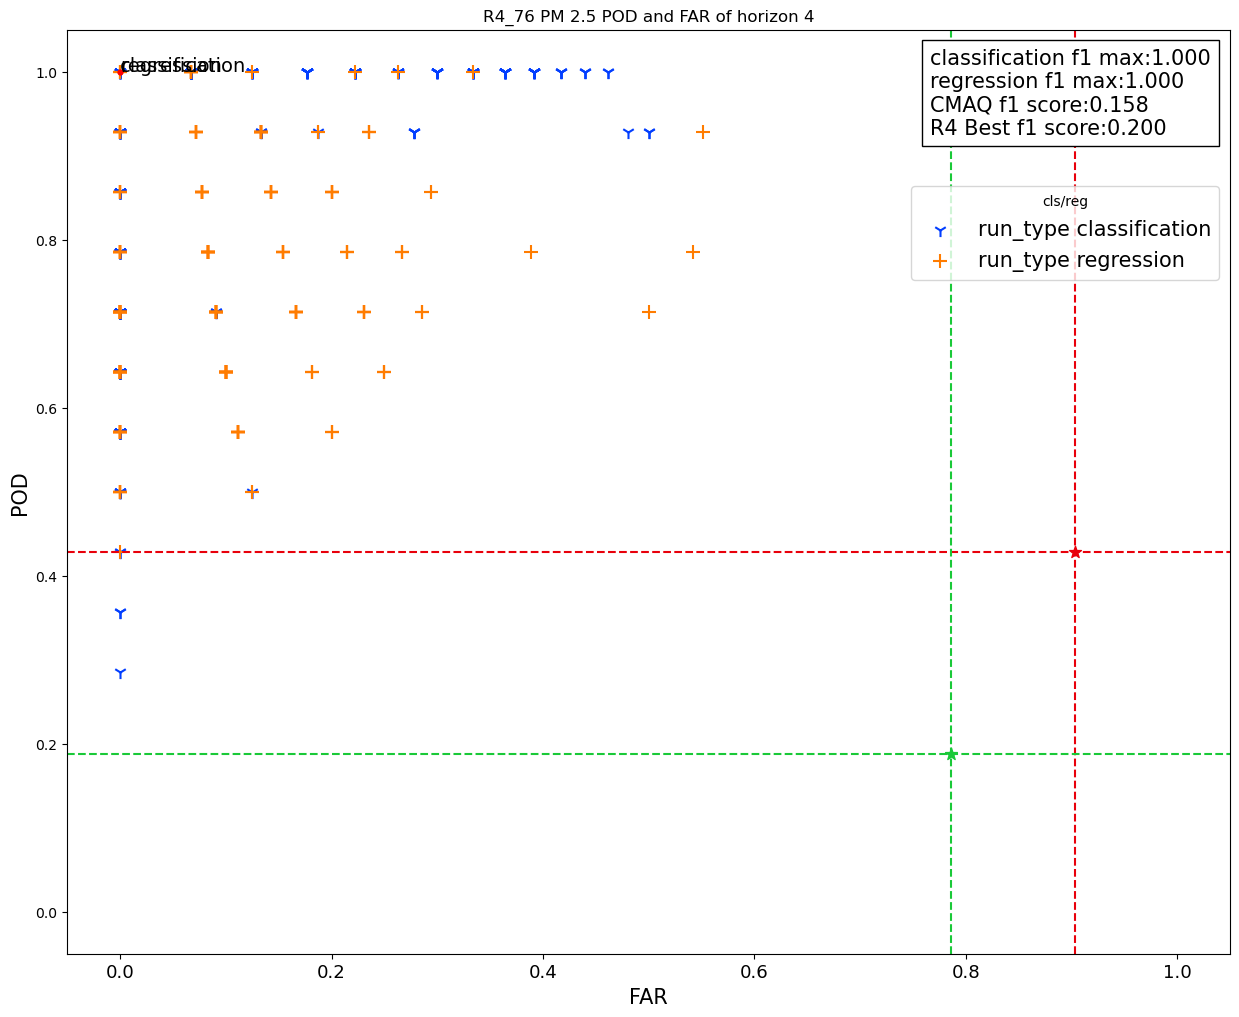

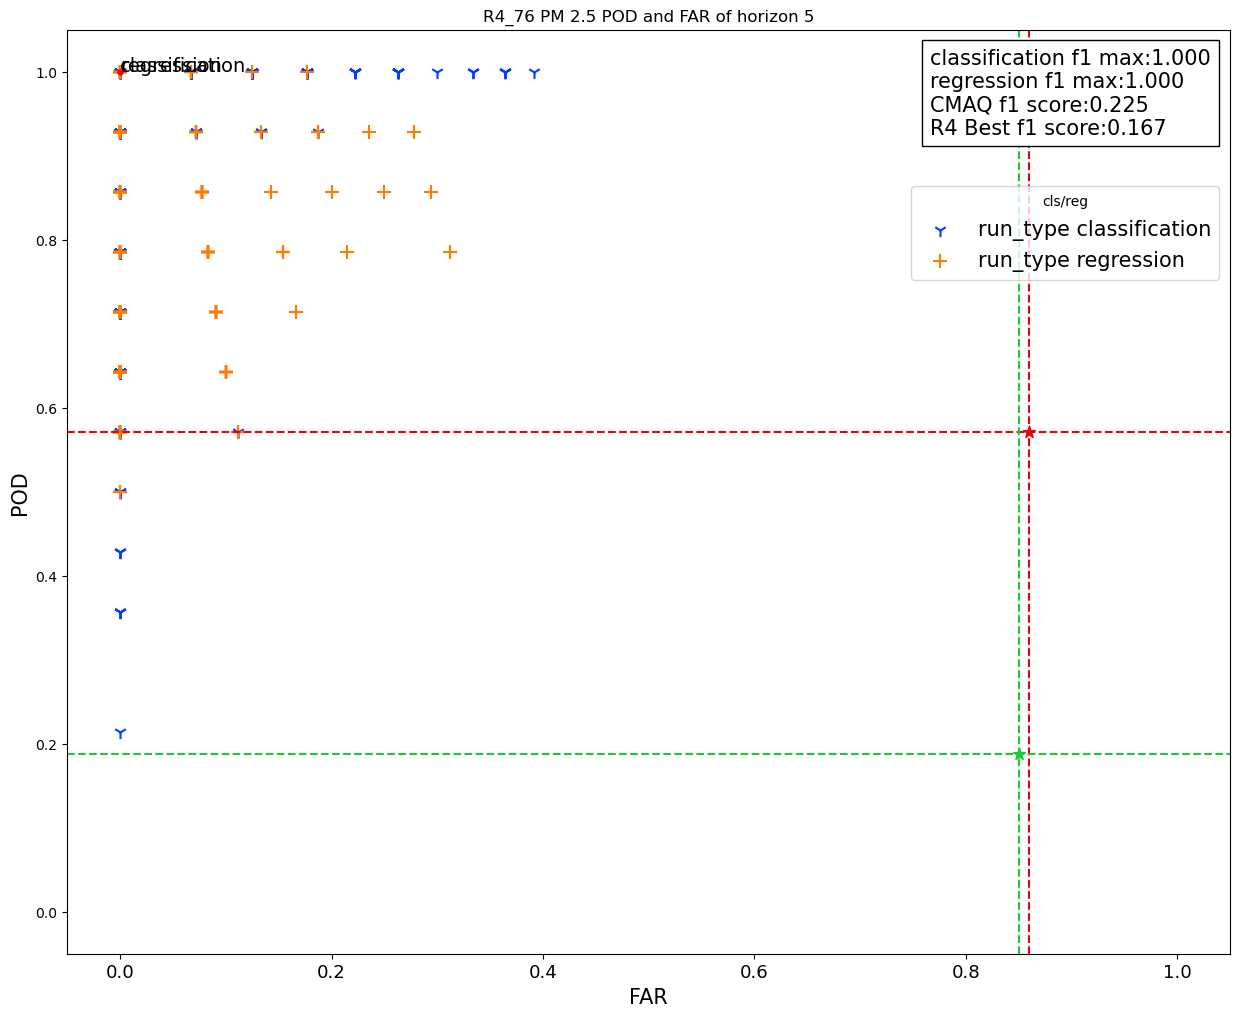

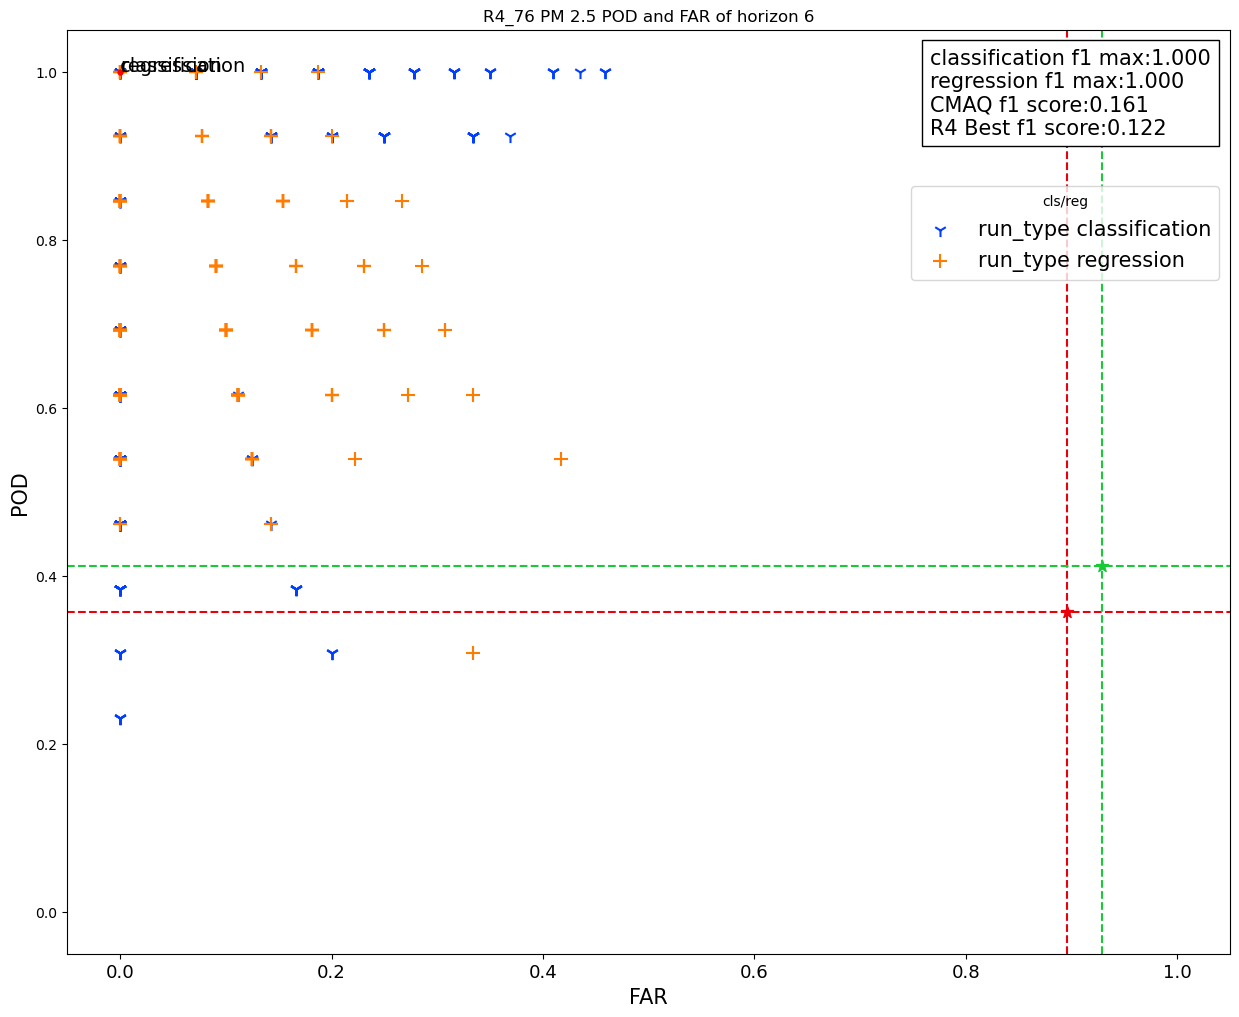

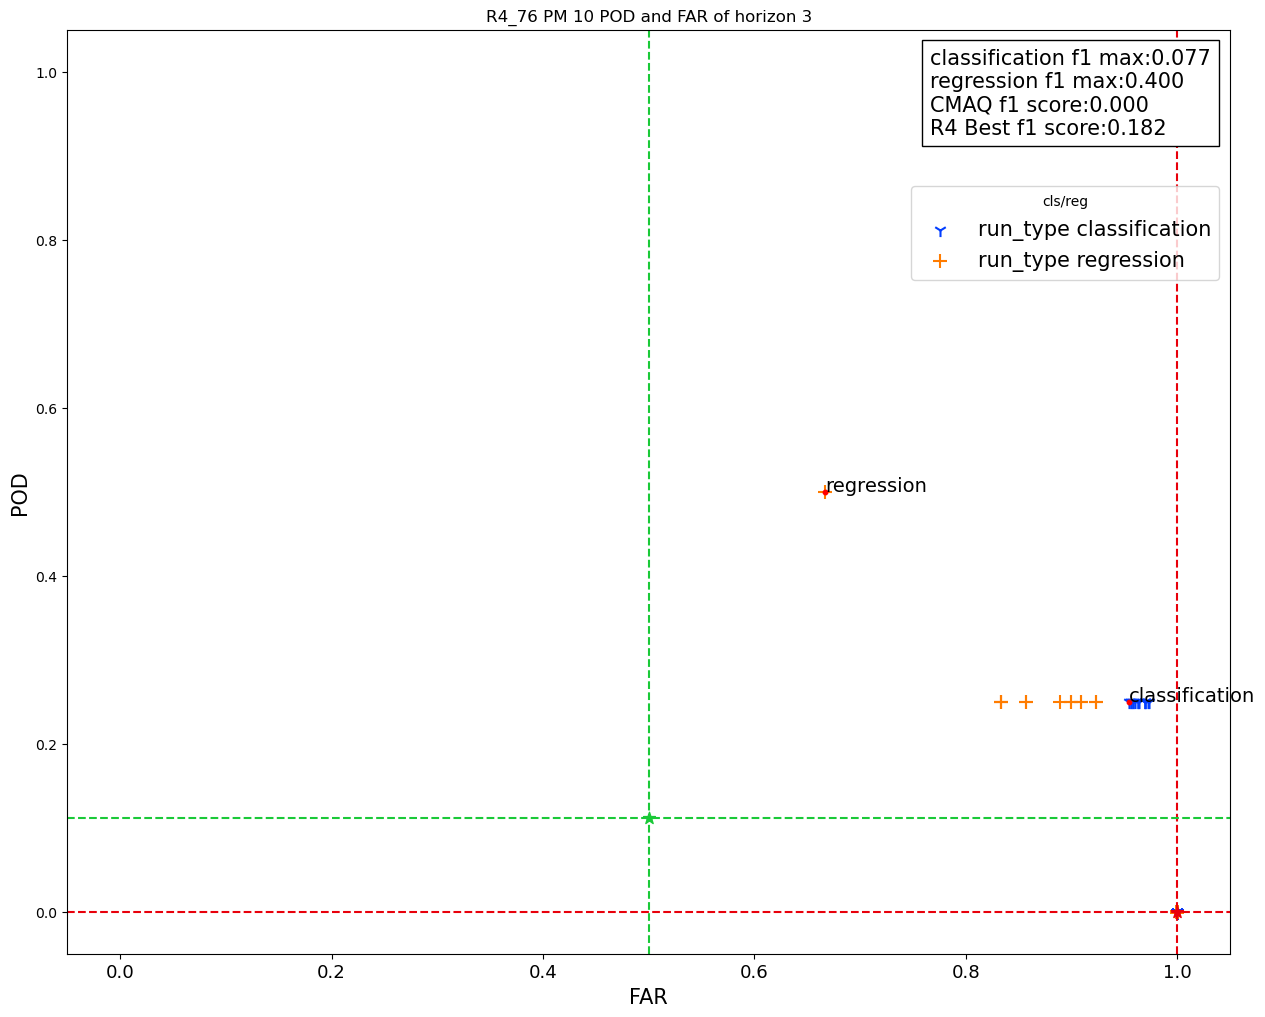

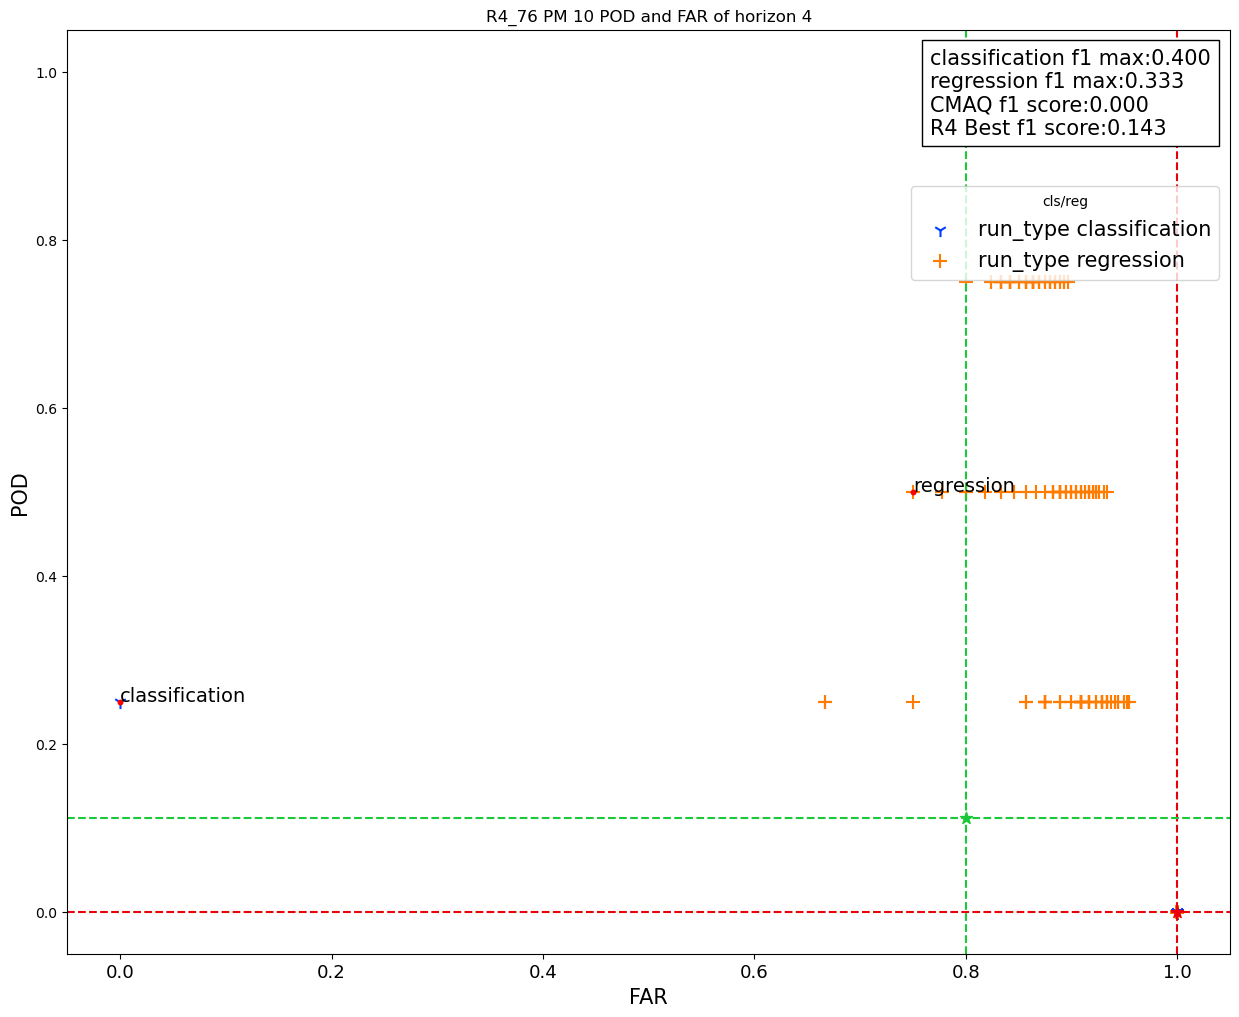

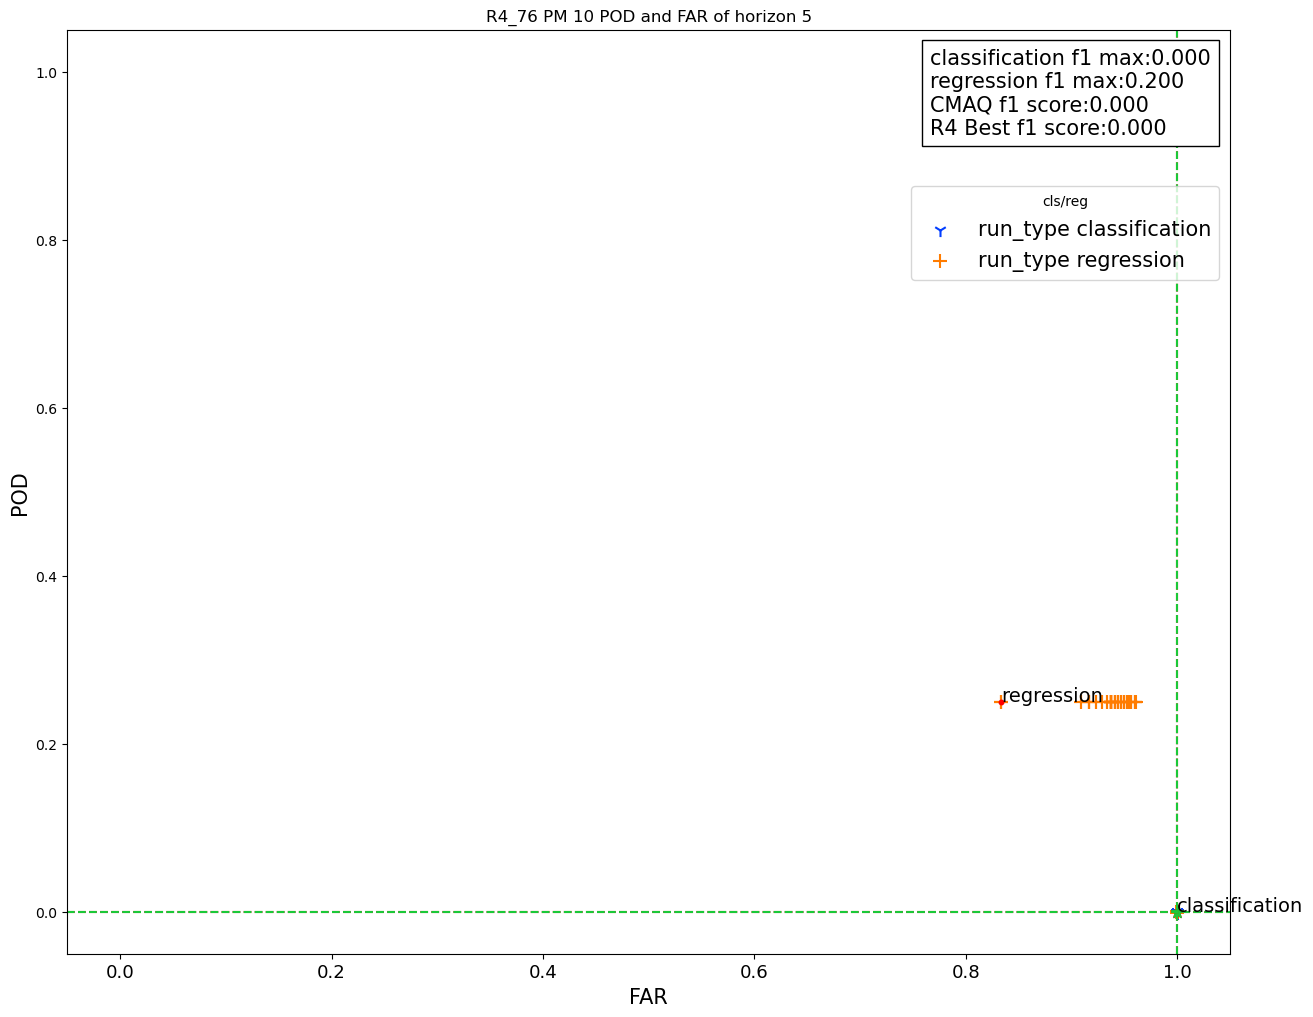

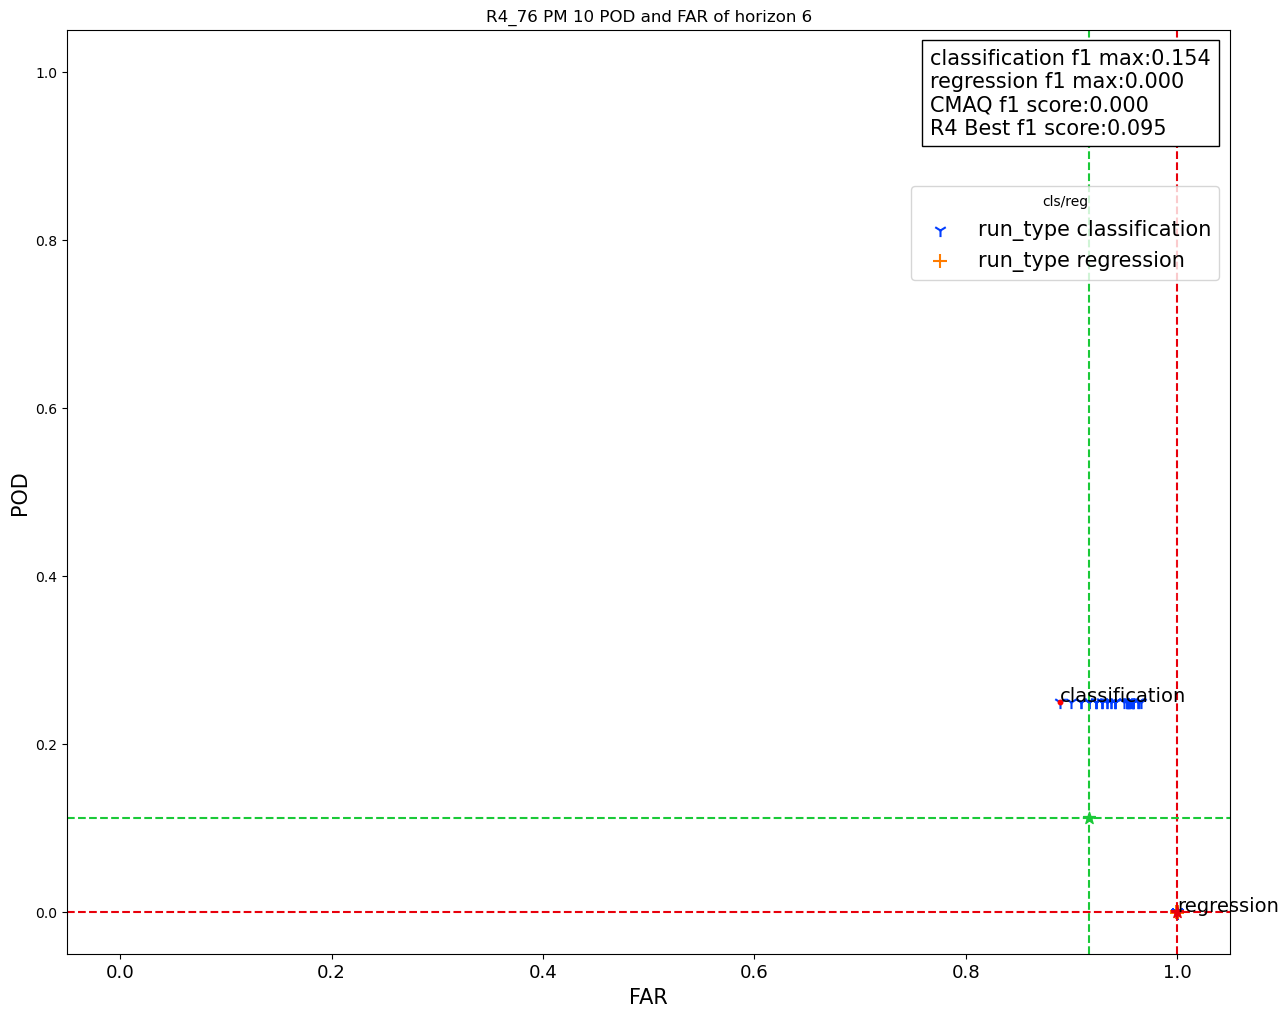

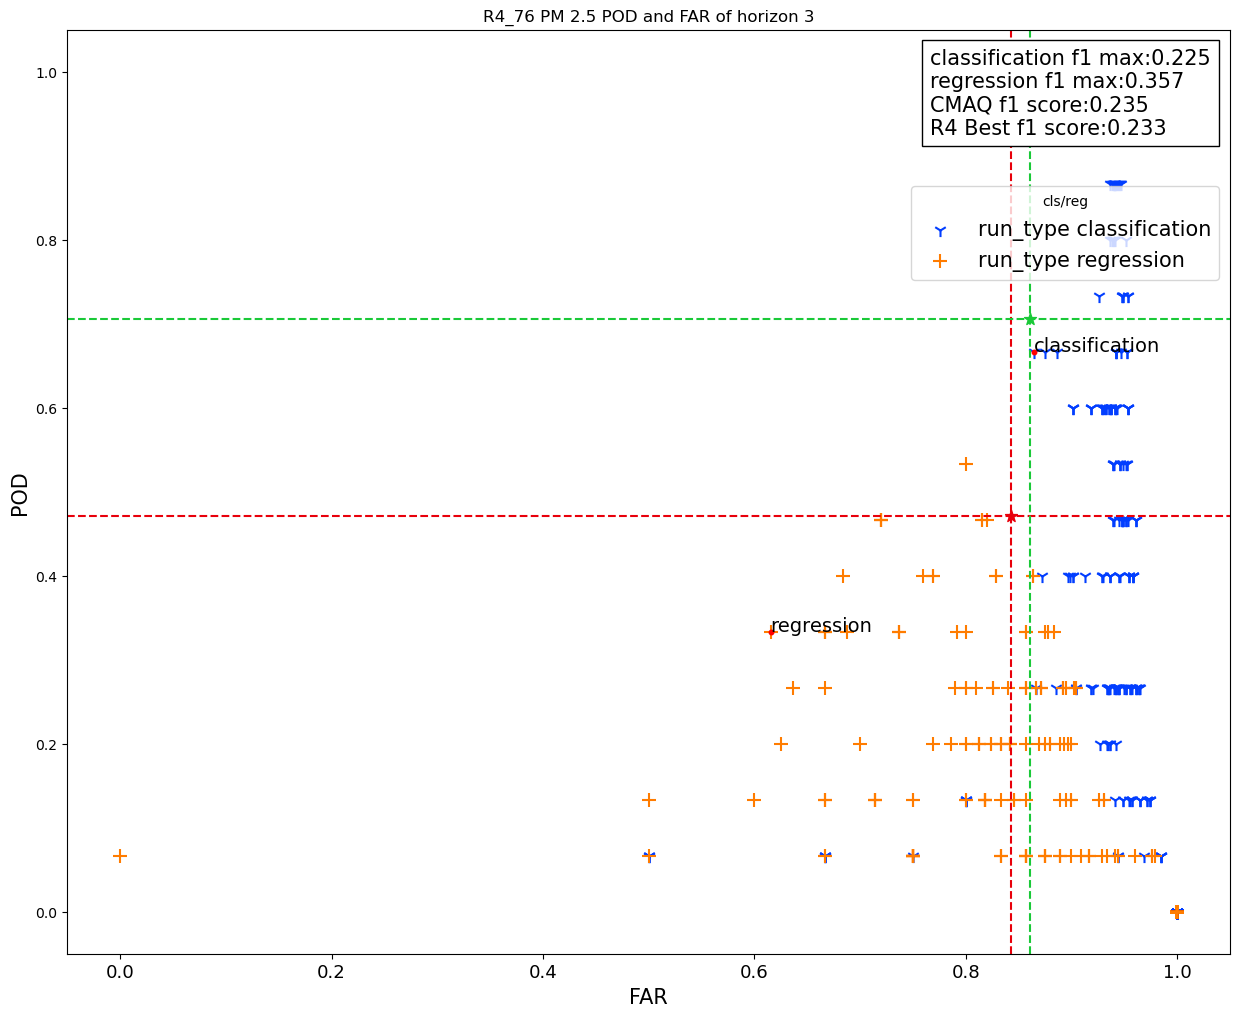

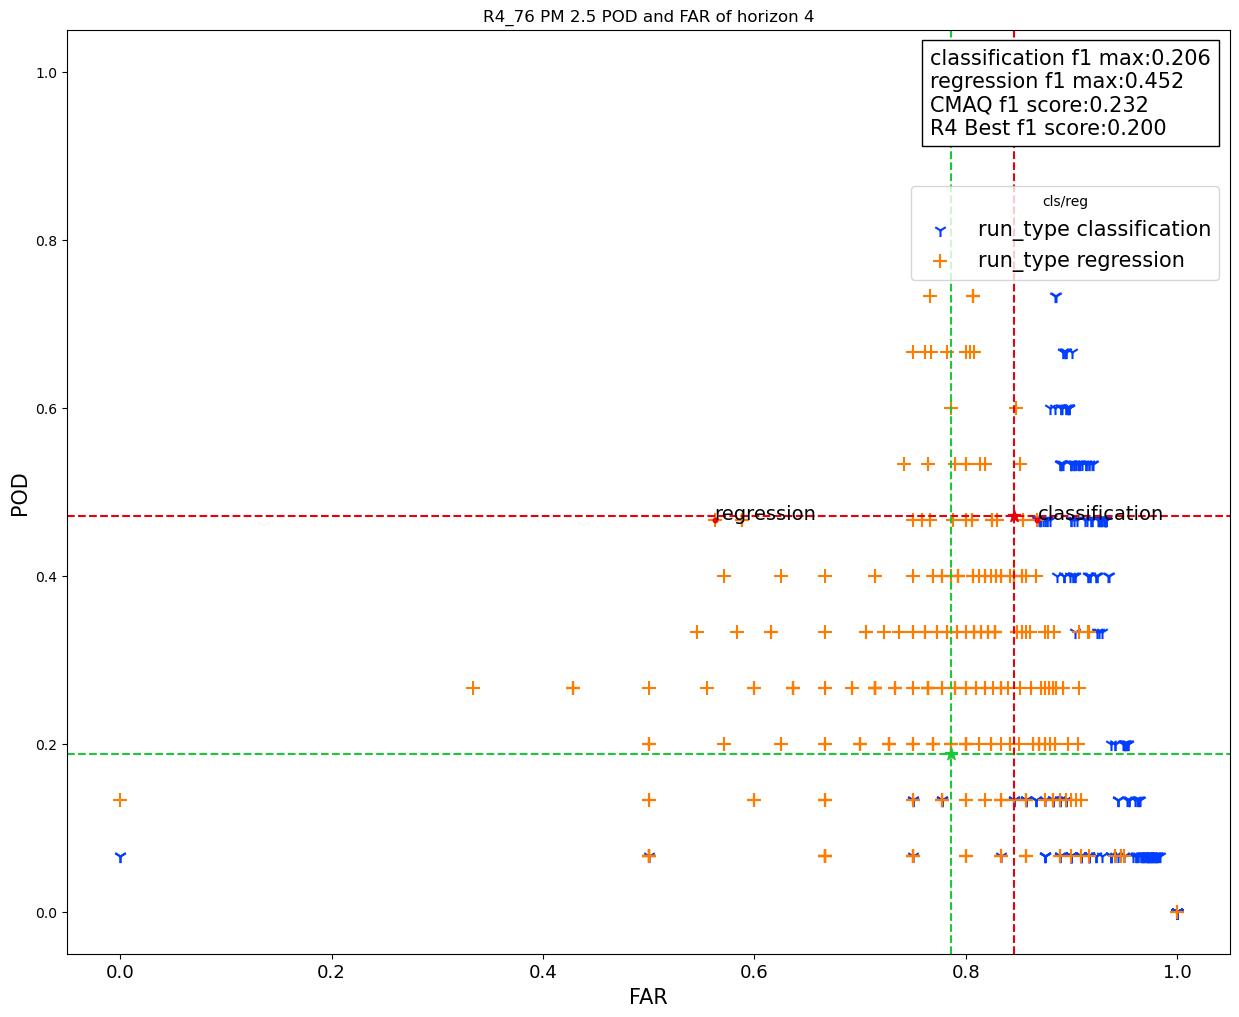

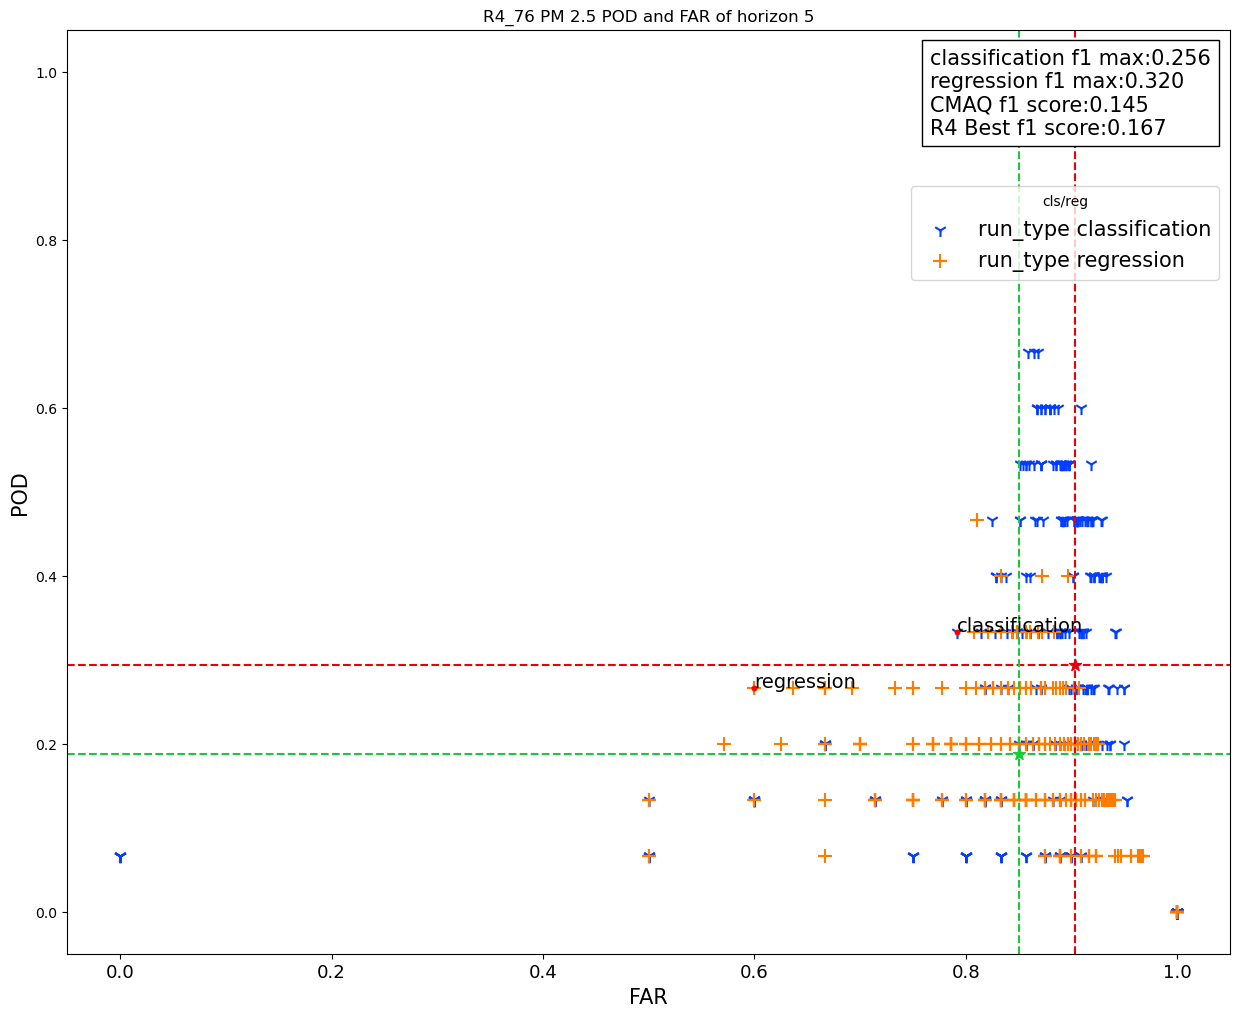

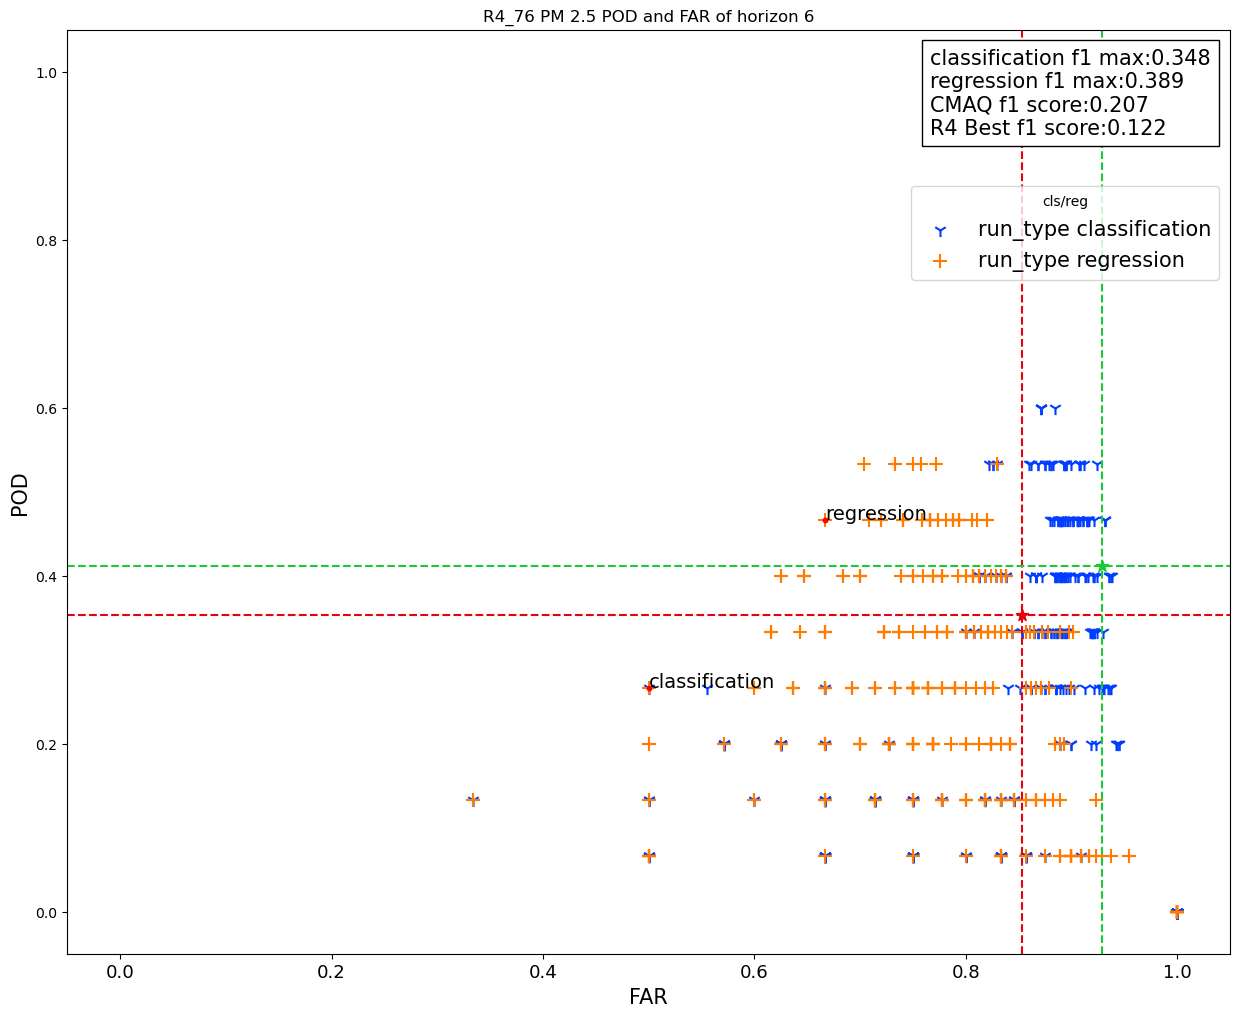

In [15]:
# # region_list = [68, 69, 70, 71, 72, 73, 74, 75, 76]
# region_list = [76]

# for num in region_list:
#     for year in [2021, 2022]:
#         for pm_type in ['PM10', 'PM25']:
#             region = f"R4_{num}"
#             result_type = year
#             pm = pm_type
#             result_dir = f'/home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/Korea_University/{region}_{result_type}inference.xlsx'
#             save_dir =  f'/home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/{region}/{region}_{result_type}'
#             cmaq_dir = f'./data_folder/cmaq{result_type}.csv'
#             r4_result_dir = f'./data_folder/all_best_result_r4.xlsx'
#             result_df = pd.read_excel(result_dir, index_col=0)
#             cmaq_df = pd.read_csv(cmaq_dir, index_col=0)
#             cmaq_df.rename(columns={'pm':'pm_type', 'region':'predict_region'}, inplace=True)
#             r4_result_df = pd.read_excel(r4_result_dir, index_col=0)
#             r4_result_df.rename(columns={'pm':'pm_type', 'region':'predict_region'}, inplace=True)
            
            
#             scatter_plotting(region, result_df, cmaq_df, r4_result_df, pm=pm, check_column='run_type', save_dir=save_dir)

## Concat per year

In [5]:
import cv2
from matplotlib import pyplot as plt


In [13]:


region_list = [59,60,61,62,63,64,65,66,67,68]
# region_list = [59]
for num in region_list:
    region = f"R4_{num}"
    
    imgs_2021_pm10 = []
    imgs_2022_pm10 = []
    imgs_2021_pm25 = []
    imgs_2022_pm25 = []
    
    save_dir =  f'/home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/{region}/{region}_2021/'
    PM10_h3_Img = cv2.imread(save_dir + '/H3' + '/PM10.png', cv2.IMREAD_COLOR)
    PM25_h3_Img = cv2.imread(save_dir + '/H3' + '/PM25.png', cv2.IMREAD_COLOR)
    
    PM10_h4_Img = cv2.imread(save_dir + '/H4' + '/PM10.png', cv2.IMREAD_COLOR)
    PM25_h4_Img = cv2.imread(save_dir + '/H4' + '/PM25.png', cv2.IMREAD_COLOR)
    
    PM10_h5_Img = cv2.imread(save_dir + '/H5' + '/PM10.png', cv2.IMREAD_COLOR)
    PM25_h5_Img = cv2.imread(save_dir + '/H5' + '/PM25.png', cv2.IMREAD_COLOR)
    
    PM10_h6_Img = cv2.imread(save_dir + '/H6' + '/PM10.png', cv2.IMREAD_COLOR)
    PM25_h6_Img = cv2.imread(save_dir + '/H6' + '/PM25.png', cv2.IMREAD_COLOR)
        
    imgs_2021_pm10.append([PM10_h3_Img, PM10_h4_Img, PM10_h5_Img, PM10_h6_Img])
    imgs_2021_pm25.append([PM25_h3_Img, PM25_h4_Img, PM25_h5_Img, PM25_h6_Img])
    
    # for horizon in ['H3', 'H4', 'H5', 'H6']:
    save_dir =  f'/home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/{region}/{region}_2022/'
    PM10_h3_Img = cv2.imread(save_dir + '/H3' + '/PM10.png', cv2.IMREAD_COLOR)
    PM25_h3_Img = cv2.imread(save_dir + '/H3' + '/PM25.png', cv2.IMREAD_COLOR)
    
    PM10_h4_Img = cv2.imread(save_dir + '/H4' + '/PM10.png', cv2.IMREAD_COLOR)
    PM25_h4_Img = cv2.imread(save_dir + '/H4' + '/PM25.png', cv2.IMREAD_COLOR)
    
    PM10_h5_Img = cv2.imread(save_dir + '/H5' + '/PM10.png', cv2.IMREAD_COLOR)
    PM25_h5_Img = cv2.imread(save_dir + '/H5' + '/PM25.png', cv2.IMREAD_COLOR)
    
    PM10_h6_Img = cv2.imread(save_dir + '/H6' + '/PM10.png', cv2.IMREAD_COLOR)
    PM25_h6_Img = cv2.imread(save_dir + '/H6' + '/PM25.png', cv2.IMREAD_COLOR)
        
    imgs_2022_pm10.append([PM10_h3_Img, PM10_h4_Img, PM10_h5_Img, PM10_h6_Img])
    imgs_2022_pm25.append([PM25_h3_Img, PM25_h4_Img, PM25_h5_Img, PM25_h6_Img])
    
    for i, (img_2021_pm10, img_2021_pm25, img_2022_pm10, img_2022_pm25) in enumerate(zip(imgs_2021_pm10, imgs_2021_pm25, imgs_2022_pm10, imgs_2022_pm25)):
        pm10_2021 = cv2.hconcat(img_2021_pm10)
        pm10_2022 = cv2.hconcat(img_2022_pm10)
        pm10 = cv2.vconcat([pm10_2021, pm10_2022])
        save_dir =  f'/home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/{region}/PM10_img.png'
        cv2.imwrite(save_dir, pm10)
                
        pm25_2021 = cv2.hconcat(img_2021_pm25)
        pm25_2022 = cv2.hconcat(img_2022_pm25)
        pm25 = cv2.vconcat([pm25_2021, pm25_2022])
        save_dir =  f'/home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/{region}/PM25_img.png'
        cv2.imwrite(save_dir, pm25)
        
        # pm10_2022 = cv2.hconcat(img_2022_pm10)
        # save_dir =  f'/home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/{region}/PM10_img.png'
        # cv2.imwrite(save_dir, pm10_2022)
                
        # pm25_2022 = cv2.hconcat(img_2022_pm25)
        # save_dir =  f'/home/pink/dust/external_drive/dust_prediction_phase_2_multiGPU/ScatterPlot/{region}/PM25_img.png'
        # cv2.imwrite(save_dir, pm25_2022)
        
        # plt.imshow(concatedImg)
        # plt.title('my picture')
        # plt.show()

